In [97]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import os

In [98]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [99]:
from file_handler import *
from plot import *
from selector import *

In [76]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [18]:
file_handler = FileHandler()

In [4]:
store_df = pd.read_csv('../data/store.csv') 
train_df = pd.read_csv('../data/train.csv')

C:\Users\Danayt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Merge the clean datas of store and train first 

In [5]:
df = pd.merge(train_df, store_df, how='inner', on='Store')


In [6]:
df.shape


(1017209, 28)

In [19]:
#put the merged ones in to one file 
file_handler.to_csv(df, '../data/merged.csv')

In [22]:
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
5,1,7,2015-07-26,0,0,0,0,0,0,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0


## Univariate Analysis

### Non-Graphical 

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0
DayOfMonth,1017209.0,15.702790,8.787638,1.0,8.0,16.0,23.0,31.0


### Store type

In [30]:
# unique value counts
counts_df = df['StoreType'].value_counts()
counts_df

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

### Assortment

In [34]:
# unique value counts
counts_df = df['Assortment'].value_counts()
counts_df

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

### CompetitionDistance

In [41]:
# unique value counts
counts_df = df['CompetitionDistance'].value_counts()
counts_df.head()

250.0     11120
350.0      7536
50.0       7536
1200.0     7374
190.0      7352
Name: CompetitionDistance, dtype: int64

### Promo2

In [47]:
# unique value counts
counts_df = df['Promo2'].value_counts()
counts_df

1    509178
0    508031
Name: Promo2, dtype: int64

### CompetitionBeforeStoreOpened

In [48]:
# unique value counts
counts_df = df['CompetitionBeforeStoreOpened'].value_counts()
counts_df

0    693861
1    323348
Name: CompetitionBeforeStoreOpened, dtype: int64

### DayOfWeek

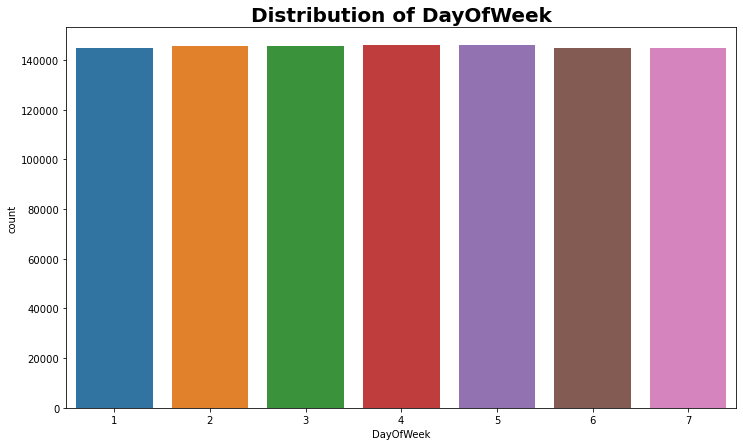

In [49]:
plot_count(df, 'DayOfWeek')

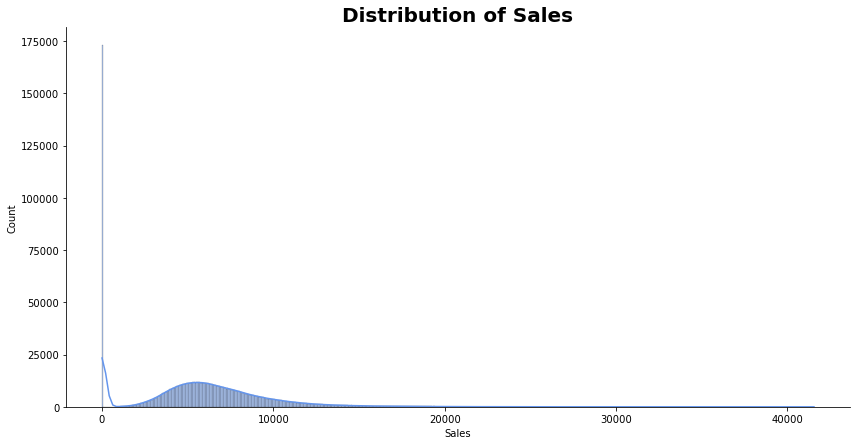

In [50]:
plot_hist(df, 'Sales')

### Customers

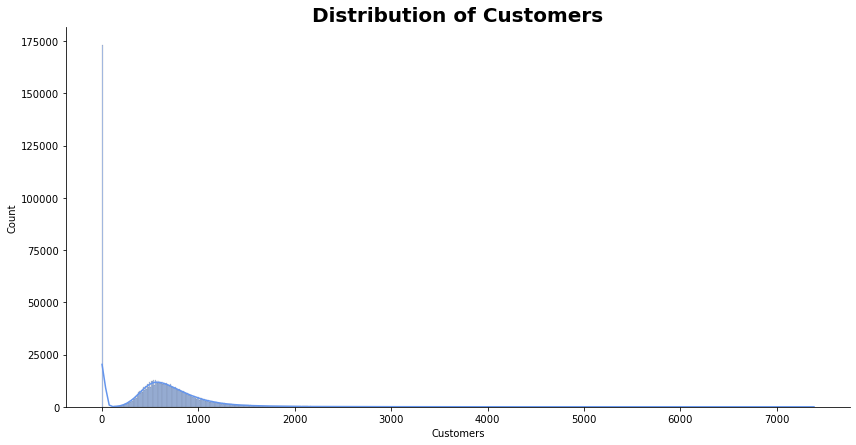

In [51]:
plot_hist(df, 'Customers')

### Open

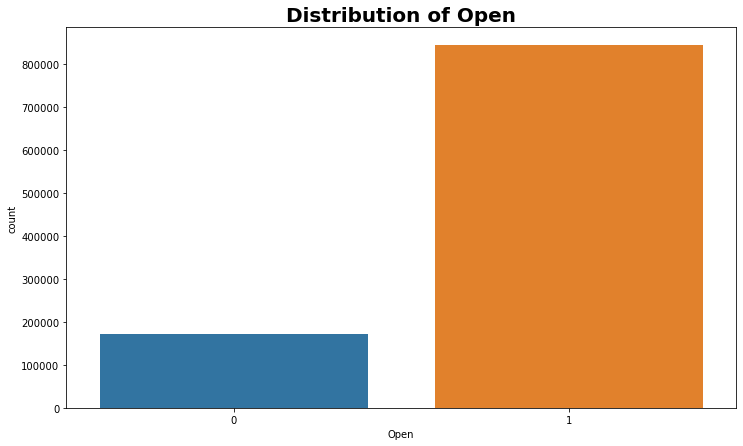

In [52]:
plot_count(df, 'Open')

### Promo

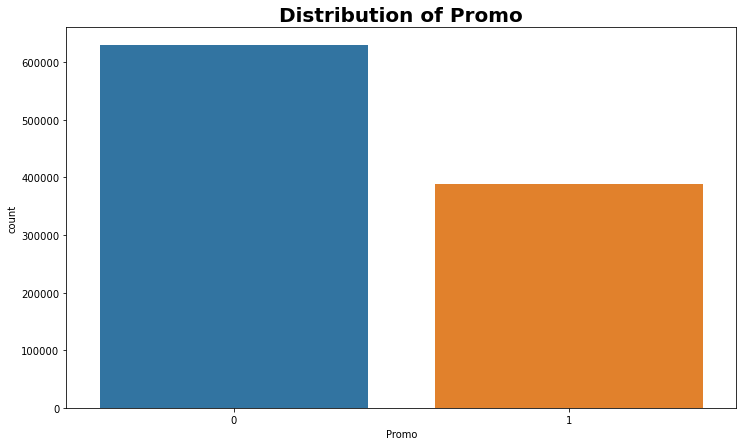

In [53]:
plot_count(df, 'Promo')

### StateHoliday

In [54]:
# unique value counts
counts_df = df['StateHoliday'].value_counts()
counts_df

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### SchoolHoliday

In [55]:
# unique value counts
counts_df = df['SchoolHoliday'].value_counts()
counts_df

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

### Bivariate Analysis

#### StateHoliday and Sales

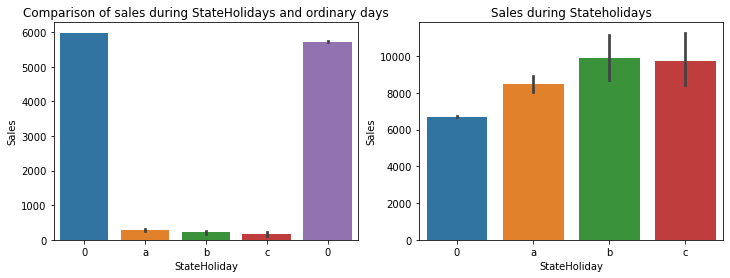

In [56]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=df, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (df["StateHoliday"] != "0") & (df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=df[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

### SchoolHoliday vs sales and Customers

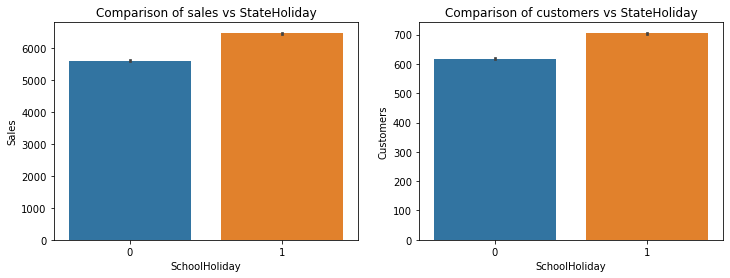

In [57]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()


### StoreType vs Sales and Customers

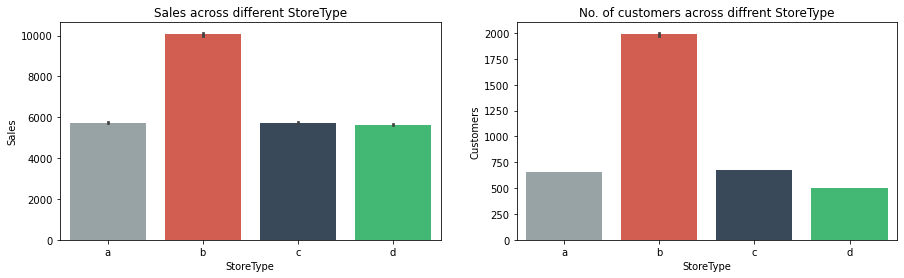

In [58]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=df, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

### Assortment vs Sales and Customers

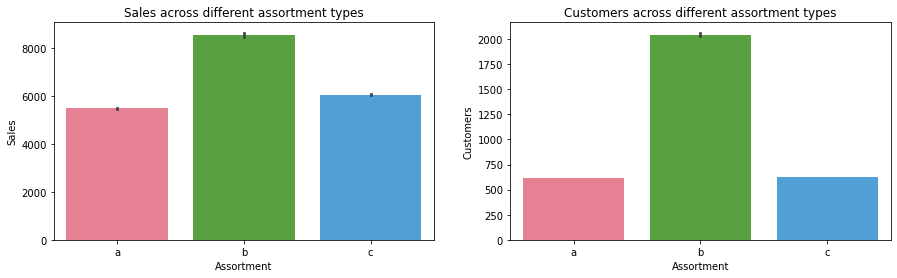

In [59]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

### DayOfWeek vs Sales and Customers

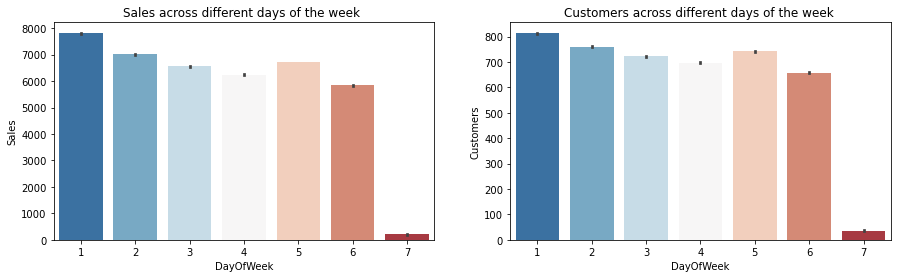

In [61]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=df, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=df, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

### Promo vs Sales and Customers

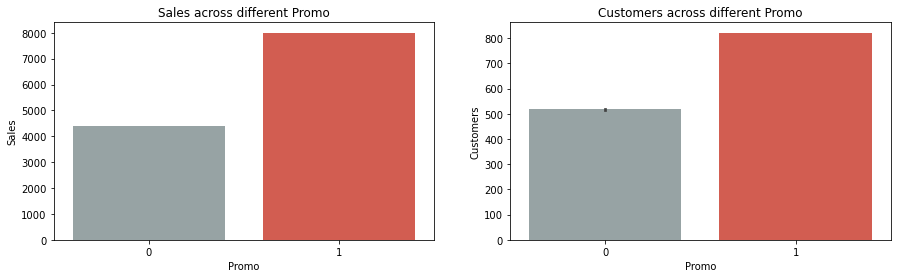

In [64]:
flatui = ["#95a5a6", "#e74c3c", "#34495e"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=df, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=df, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

### Promo2 vs Sales and Customers

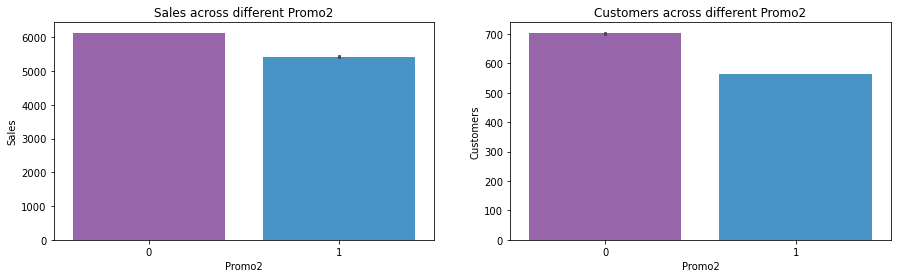

In [65]:
flatui = [ "#9b59b6", "#3498db"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=df, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=df, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

### PromoInterval vs Sales and Customers

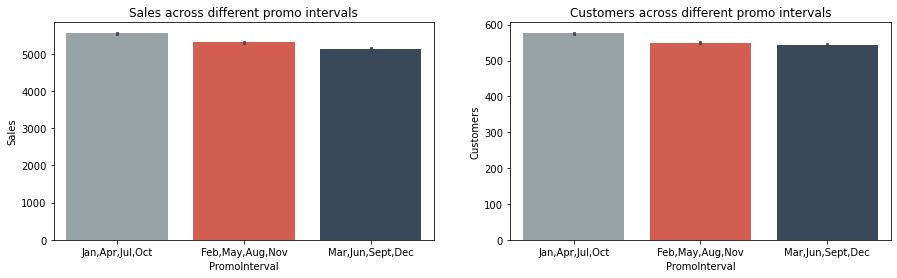

In [66]:
flatui = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (df["Promo2"] != 0)

sns.barplot(x='PromoInterval', y='Sales', data=df[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=df[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()

### Week days effects

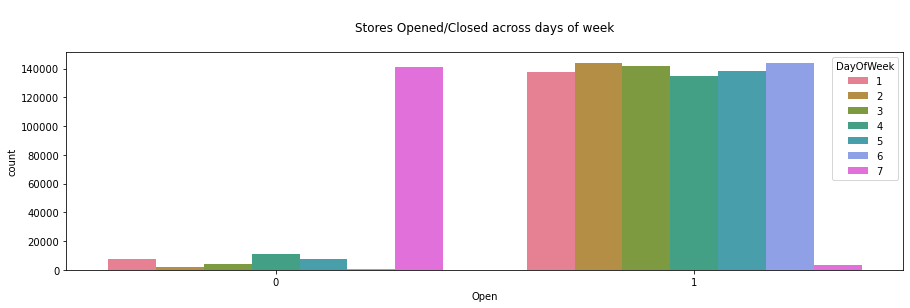

In [102]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

### Sales and Month

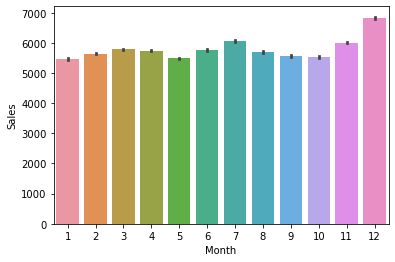

In [68]:
sns.barplot(x='Month', y='Sales', data=df)
plt.show()

### CompetitionDistance and Sales

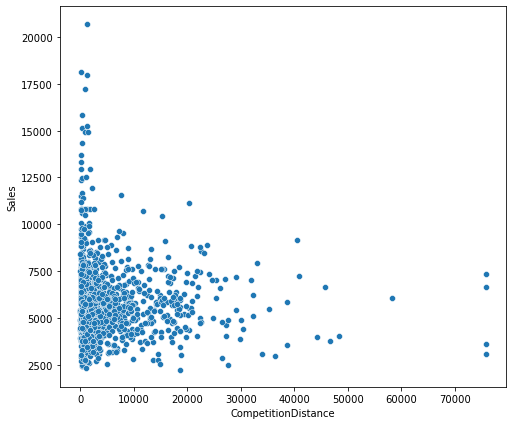

In [69]:
a = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

### Correlation Analysis

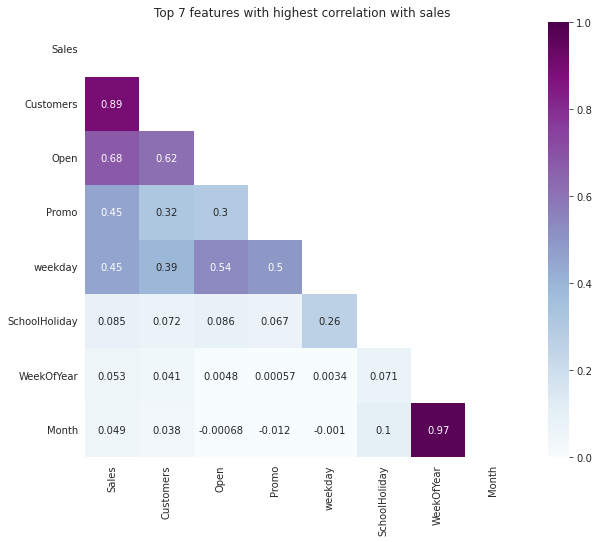

In [105]:
f_most_correlated = df.corr().nlargest(8,'Sales')['Sales'].index
f_correlation = df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

## Filtering Data and Answering Business Questions


### Distribution of promotion in the training and test datasets

In [71]:
# reading test data
test_df = file_handler.read_csv("../data/test.csv")
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


C:\Users\Danayt\AppData\Local\Temp/ipykernel_24196/875306674.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



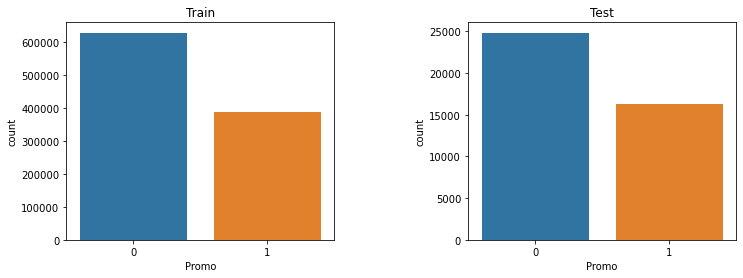

In [72]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_df, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_df, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()

## comment 

### Monthly sales trend per store type

In [73]:
store_type_a = df[df.StoreType == 'a']
store_type_b = df[df.StoreType == 'b']
store_type_c = df[df.StoreType == 'c']
store_type_d = df[df.StoreType == 'd']

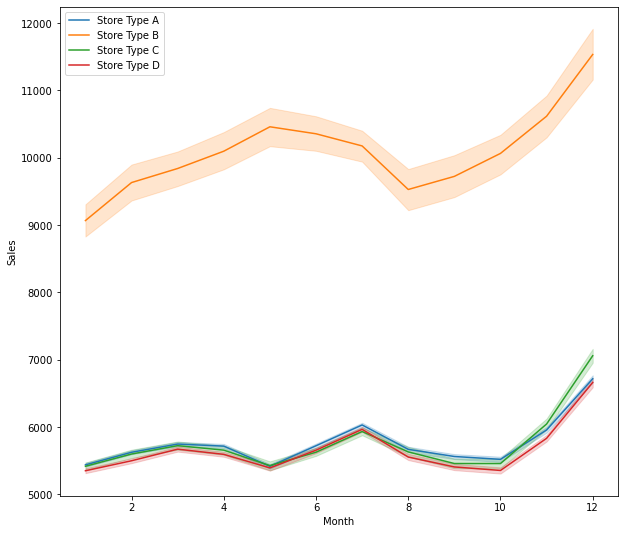

In [74]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

### Monthly sales per StoreType and Promo

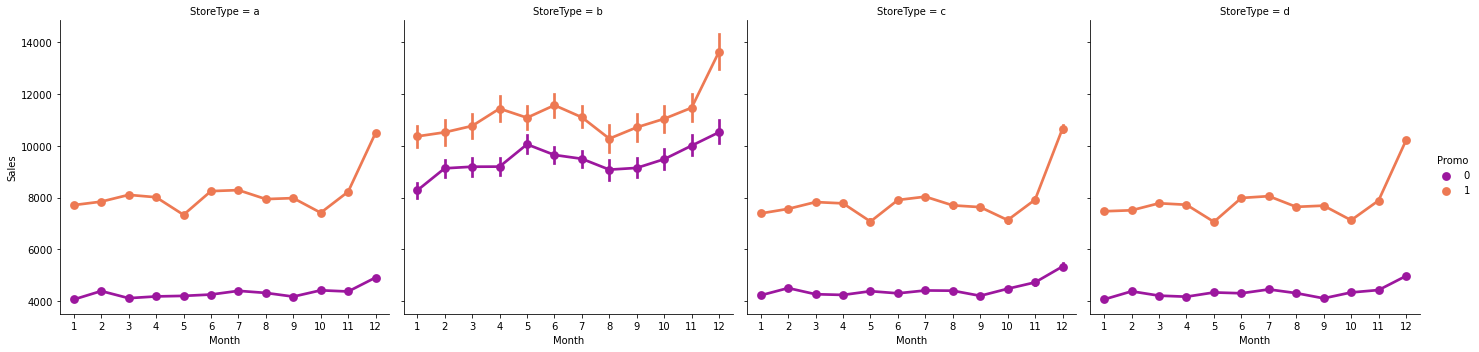

In [77]:
sns.factorplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly sales per StoreType and Promo

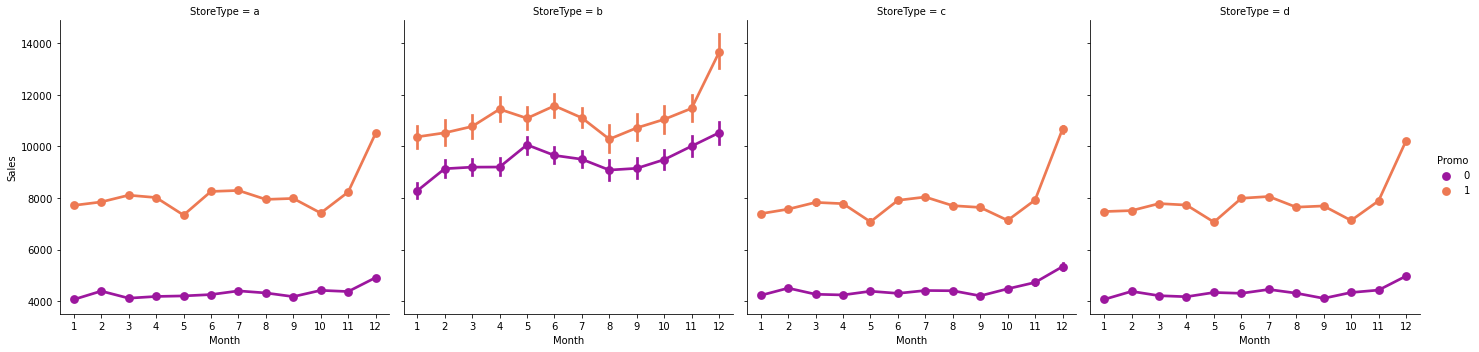

In [79]:
sns.factorplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly customers per StoreType and Promo

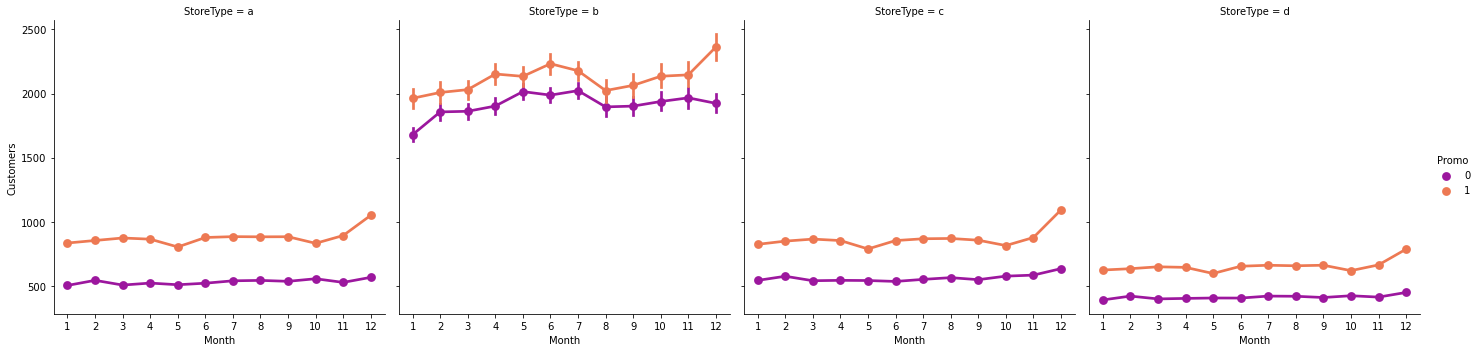

In [80]:
sns.factorplot(data = df, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly sales per Assortment and Promo

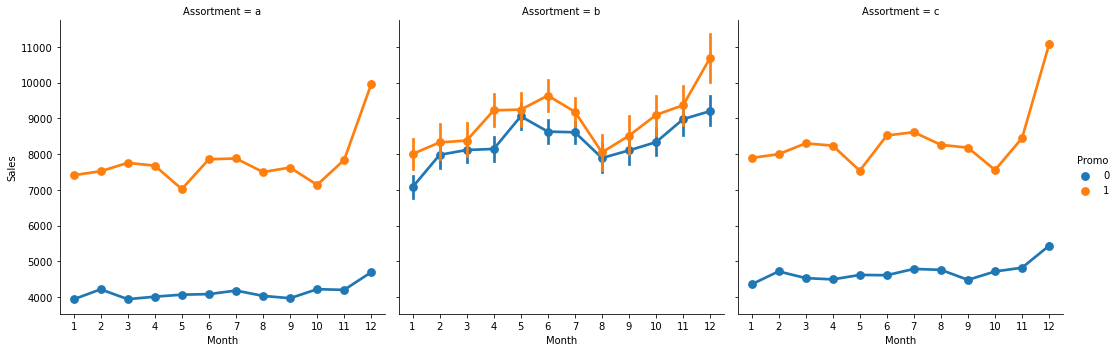

In [81]:
sns.factorplot(data = df, x = 'Month', y = 'Sales', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

### Monthly customers per Assortment and Promo

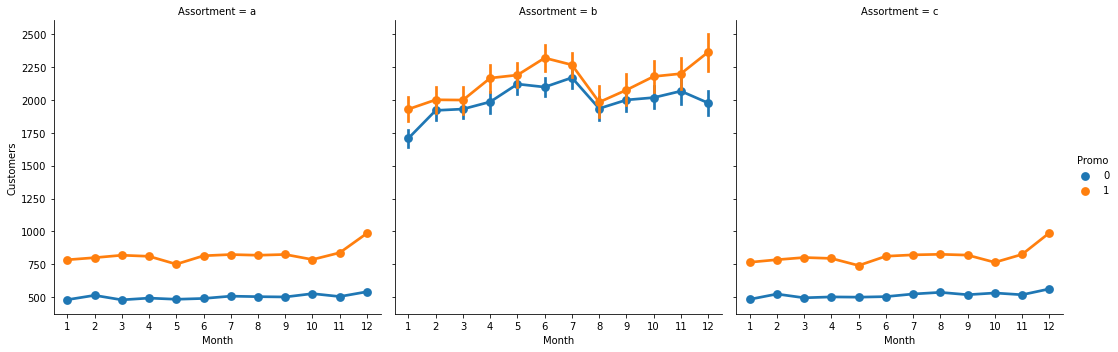

In [82]:
sns.factorplot(data = df, x = 'Month', y = 'Customers', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

### Sales of stores open per DayOfWeek and StoreType

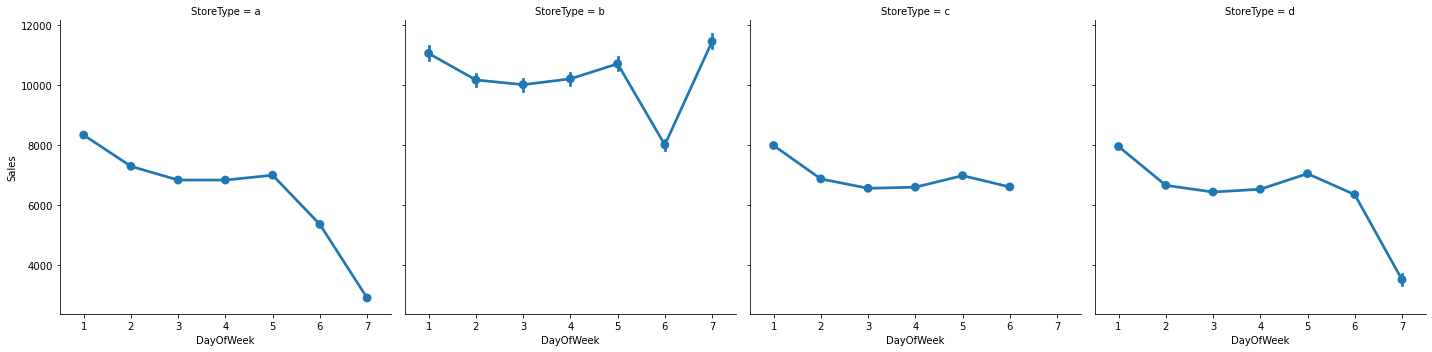

In [83]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

### Customers of stores open per DayOfWeek and StoreType

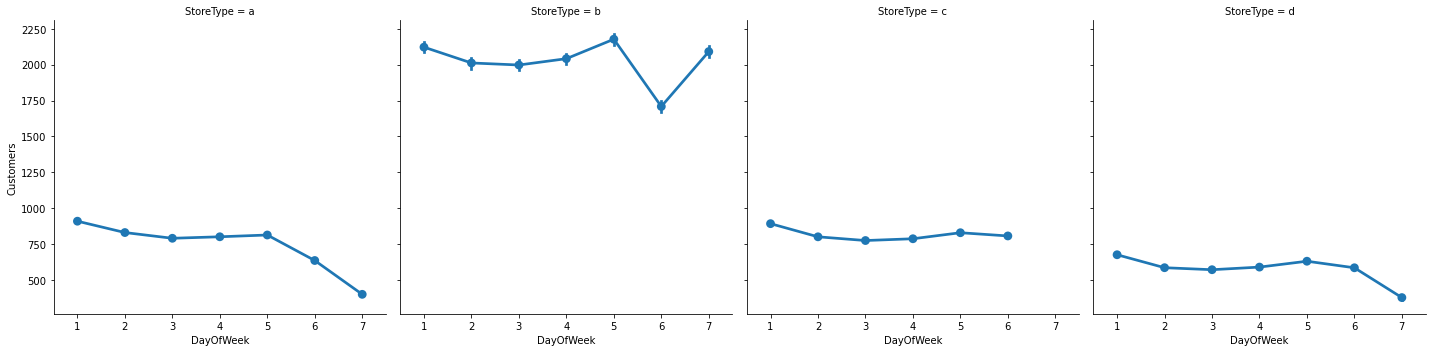

In [84]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

### Sales of stores open per DayOfWeek and Assortment

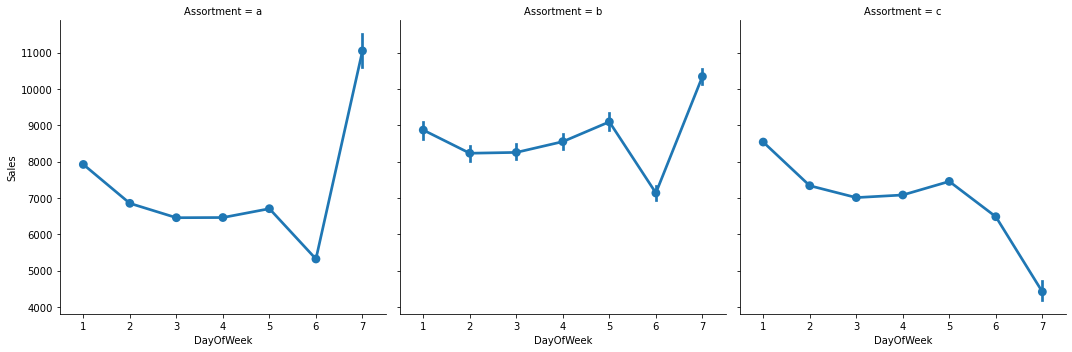

In [85]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='Assortment', col_order=['a','b','c'])
plt.show()

### Customers of stores open per DayOfWeek and Assortment

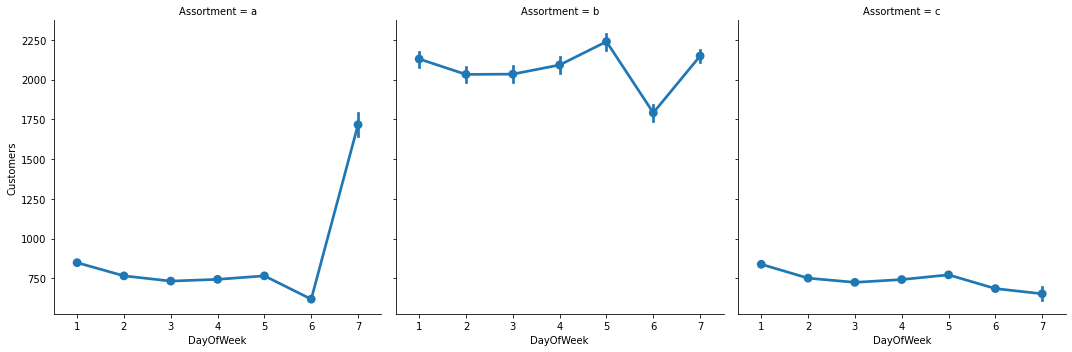

In [86]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='Assortment', col_order=['a','b','c'])
plt.show()

### Sales before, after and during Christmas

In [100]:
before_index = (df["Date"] >= pd.to_datetime("2013-11-25")) & (df["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (df["Date"] >= pd.to_datetime("2013-12-25")) & (df["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (df["Date"] >= pd.to_datetime("2014-01-01")) & (df["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'